## Statistical Time Series Analysis

### Import Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

### Load Datasets

In [2]:
df = pd.read_csv('wl_ts_data.csv')

# Set the timestamp column as the index
df['time_met'] = pd.to_datetime(df['time_met'])
df.set_index('time_met', inplace=True)

# Drop columns
df = df[['wl_obs']]

# Drop rows
start_date = pd.to_datetime('2023-04-01 04:00:00')
end_date = pd.to_datetime('2024-04-30 04:00:00')
df = df[(df.index > start_date) & (df.index < end_date)]

df.head()

,wl_obs
time_met,
2023-04-01 05:00:00,-0.042672
2023-04-01 06:00:00,0.081280
2023-04-01 07:00:00,0.216408
2023-04-01 08:00:00,0.324104
2023-04-01 09:00:00,0.411480


### Decomposition of Time Series

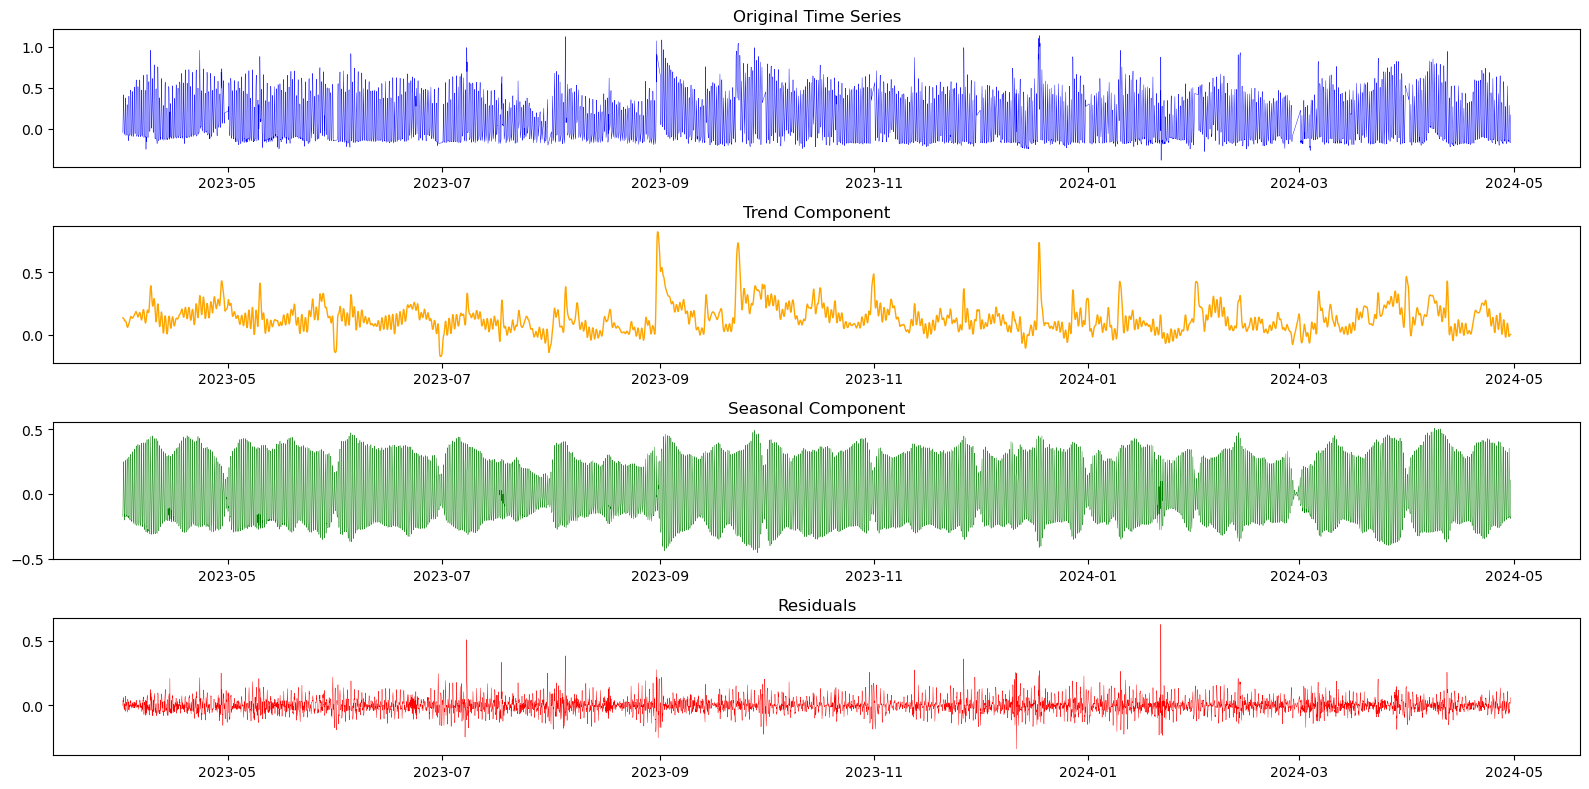

In [3]:
stl = STL(df, period=12)  # Adjust the period parameter
result = stl.fit()

plt.figure(figsize=(16, 8))
plt.subplot(411)
plt.plot(df, linewidth=0.3, color='blue')
plt.title('Original Time Series')

plt.subplot(412)
plt.plot(result.trend, linewidth=1.0, color='orange')
plt.title('Trend Component')

plt.subplot(413)
plt.plot(result.seasonal, linewidth=0.3, color='green')
plt.title('Seasonal Component')

plt.subplot(414)
plt.plot(result.resid, linewidth=0.3, color='red')
plt.title('Residuals')

plt.tight_layout()
plt.show()

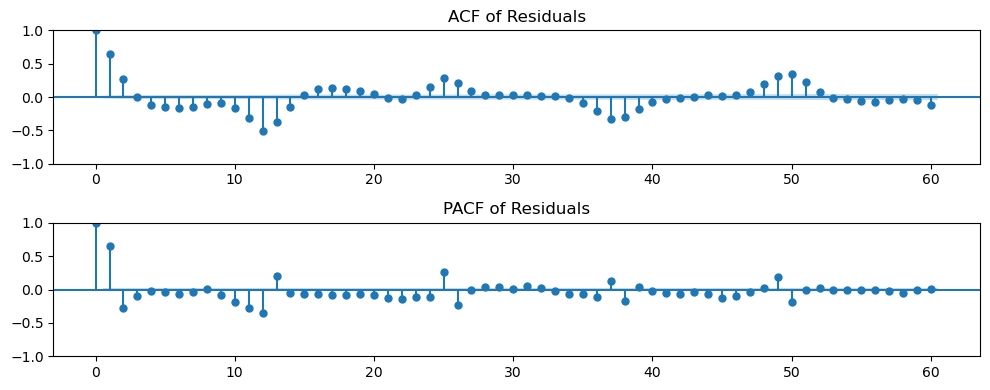

In [4]:
# Plot ACF and PACF for residuals
plt.figure(figsize=(10, 4))
plt.subplot(211)
plot_acf(result.resid.dropna(), lags=60, ax=plt.gca())
plt.title('ACF of Residuals')

plt.subplot(212)
plot_pacf(result.resid.dropna(), lags=60, ax=plt.gca())
plt.title('PACF of Residuals')

plt.tight_layout()
plt.show()

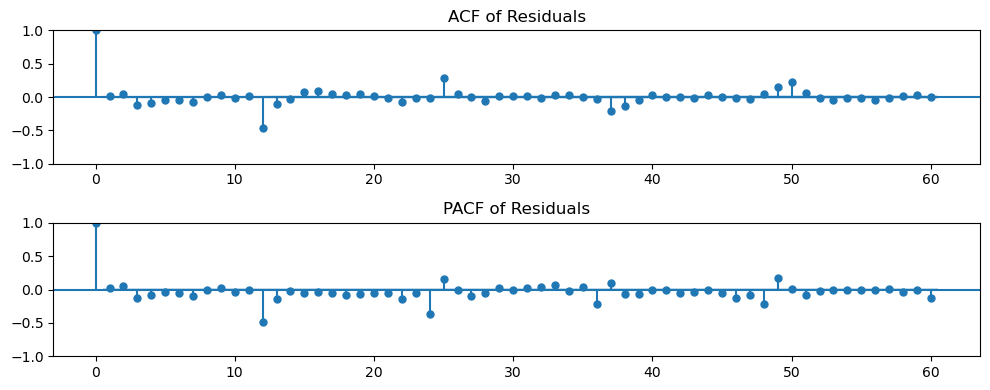

In [5]:
# Fit a SARIMAX model to the residuals
result.resid.index.freq = pd.infer_freq(df.index)
sarimax = SARIMAX(result.resid, order=(1,0,1), seasonal_order=(1,0,1,24))
result_2 = sarimax.fit()

# Plot ACF and PACF for residuals
plt.figure(figsize=(10, 4))
plt.subplot(211)
plot_acf(result_2.resid.dropna(), lags=60, ax=plt.gca())
plt.title('ACF of Residuals')

plt.subplot(212)
plot_pacf(result_2.resid.dropna(), lags=60, ax=plt.gca())
plt.title('PACF of Residuals')

plt.tight_layout()
plt.show()